# Matplotlib 한글폰트 사용하기 - todaycode오늘코드
영상 따라하기 : https://www.youtube.com/watch?v=S5N3LjhkcDs&index=6&list=PLaTc2c6yEwmr6pPq8Ht9ONtBzOvdVu0gf <br>
todaycode오늘코드 GitHub : https://github.com/corazzon/TIL/blob/master/notebook/matplotlib_font_setting.ipynb <br>

## 1. 필요한 패키지를 가져온다.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

## 2. 그래프를 그리기 위해 임의의 데이터 생성

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -13,   78,  171,  160,  132,   93,   42,  -34,   16,  -25,   17,
        -50,   26,  -52,   18,   62,   91,  167,  135,   70,   45,    6,
         73,   30,  -45,   -8,   50,   90,   -2,    2,  -92, -142,  -71,
          9,  -80,   10,   94,  105,   13,   26,   94,   52,  140,   49,
        -12,  -28,  -30,   55,   31,   22], dtype=int32)

## 3. 기본 폰트로 지정 되었기 때문에 한글이 깨짐

Text(0.5, 0, '시간(분)')

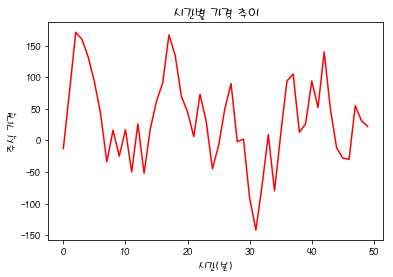

In [3]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

## 4. 폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 위치정보를 가져온다

In [4]:
print('버전: ', mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.2
설치 위치:  C:\Users\la\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\la\.matplotlib
캐시 위치:  C:\Users\la\.matplotlib


## 5. matplotlib의 위치정보를 토대로 터미널을 이용해 해당 위치로 이동

In [5]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\la\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\matplotlibrc


4에서 알아낸 설정 위치 C:\Users\la\.matplotlib를 cd를 통해 찾아 들어간다.<br>
참고로 Linux에서 파일 목록 보는 것은 ls이지만 Windows에서 cmd 창에서는 dir을 사용한다.<br>
<br>
window의 경우 동영상의 내용과 달리 vi command 사용이 불가능하기 때문에 다운로드와 설치가 필요하다<br>
vim 다운로드 : https://www.vim.org/download.php#pc<br>
설치 방법 : https://goproprada.tistory.com/389<br>

## 6.설치된 폰트를 찍어본다

In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))

1217


In [7]:
font_list_window=fm.win32InstalledFonts()
print(len(font_list_window))

604


In [8]:
font_list[:10]

['C:\\WINDOWS\\Fonts\\HYWULB.TTF',
 'C:\\Windows\\Fonts\\TrajanPro-Bold.otf',
 'C:\\Windows\\Fonts\\PLAYBILL.TTF',
 'C:\\WINDOWS\\Fonts\\HANSaleB.ttf',
 'C:\\WINDOWS\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\LTYPEB.TTF',
 'C:\\WINDOWS\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\AdobeDevanagari-Bold.otf',
 'C:\\Windows\\Fonts\\TektonPro-Bold.otf']

In [9]:
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[:10]

1217


['cmex10',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXGeneral']

## 7.나눔고딕을 사용할 예정이기 때문에 'Nanum'이 들어간 폰트만 가져와본다

In [10]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

## 8. 폰트를 사용하는 방법 3가지
 1. FontProperties를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해 주어야 한다.
 - matplotlib.rcParams[]으로 전역글꼴 설정 방법 - 그래프에 설정해주면 폰트가 필요한 항목에 적용됩니다.
 - 2번의 방법을 mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 적어주는 방법, 단 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해주지 않아도 돼서 편하다

### 1) FontProperties를 사용하는 방법 
 - 텍스트를 지정하는 항목에 지정해 사용할 수 잇따. 지정해 준 항목에만 해당 폰트가 적용된다.
 - matplotlib.pyplot
  - title()
  - xlabel()
  - ylabel()
  - legend()
  - text()
 - matplotlib.axes
  - set_title()

In [11]:
font_list[:10]

['C:\\WINDOWS\\Fonts\\HYWULB.TTF',
 'C:\\Windows\\Fonts\\TrajanPro-Bold.otf',
 'C:\\Windows\\Fonts\\PLAYBILL.TTF',
 'C:\\WINDOWS\\Fonts\\HANSaleB.ttf',
 'C:\\WINDOWS\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\LTYPEB.TTF',
 'C:\\WINDOWS\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\AdobeDevanagari-Bold.otf',
 'C:\\Windows\\Fonts\\TektonPro-Bold.otf']

만약 Nanum이나 다른 한글 폰트를 찾지 못했다면 for 문으로 다음과 같이 돌려서 찾아보는 방법 또한 참조하시길 바랍니다.
```python
for i in range(len(font_list)) :
    path = font_list[i]
    fontprop = fm.FontProperties(fname=path, size=18)

    plt.plot(range(50), data, 'r')
    plt.title(str(i)+'시간별 가격 추이', fontproperties=fontprop)
    plt.ylabel('주식 가격', fontproperties=fontprop)
    plt.xlabel('시간(분)', fontproperties=fontprop)
    plt.show()
```

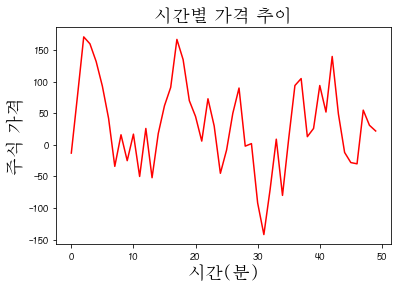

In [12]:
path = 'c:\\windows\\fonts\\HBATANG.TTF'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

### 2)matplotlib.rcParams[]으로 전역글꼴 설정 방법

In [13]:
import matplotlib.pyplot as plt

print('# 설정 되어있는 폰트 사이즈', plt.rcParams['font.size'])
print('# 설정 되어있는 폰트 글꼴', plt.rcParams['font.family'])

# 설정 되어있는 폰트 사이즈 10.0
# 설정 되어있는 폰트 글꼴 ['MDAlong']


In [14]:
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


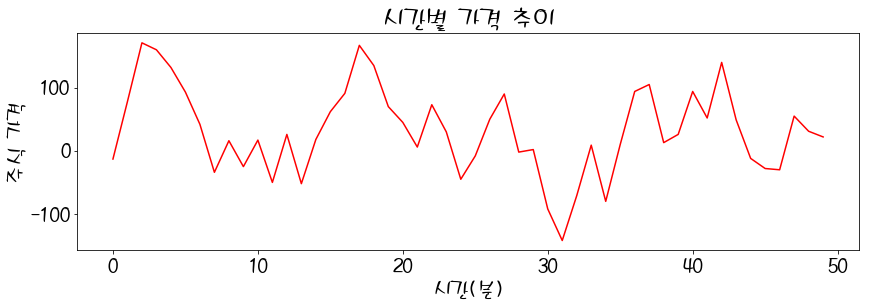

In [15]:
#plt.rcParams.keys()
plt.rcParams['font.family']='MDAlong'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (14,4)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

만약 한글이 표기가 되지 않으면 아래 위치 안에 있는 디렉토리 fonts -> ttf 폴더까지 들어가서 <br>
현재 윈도우가 설치되어 있는 폰트 디렉토리인 C:\Windows\Fonts의 한글 여러개를 복사해서 집어 넣는다 <br>
참고로 저는 'MD아롱체 보통'이라는 font를 가져다 사용 

In [16]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\la\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\matplotlibrc


그 후 아래와 같이 font_name을 받아 그 이름을 plt.rcParams['font.family']와 같다고 표기해주면 된다.

In [17]:
path = 'C:\\WINDOWS\\Fonts\\Along.ttf'
font_name=fm.FontProperties(fname=path, size=50).get_name()
print(font_name)

MDAlong


#### rcParams 대신 FontProperties와 plt.rc를 사용하는 방법

MDAlong


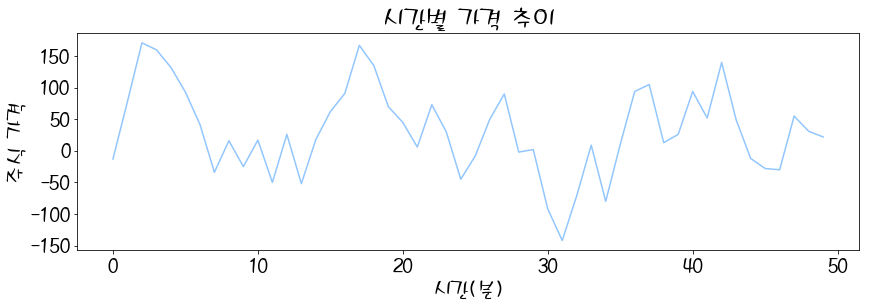

In [18]:
#path='C:\\Windows\\Fonts\\HANSaleB.ttf'
path = 'C:\\WINDOWS\\Fonts\\Along.ttf'
font_name=fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

## 3) rcParams를 설정파일에 직접 적어주는 방법 - 모든 노트북에 공통적용
 - font.family : MDAlong
 - 이 외에 자주 사용하는 설정도 함께 해주면 편리함
 - 이곳에 폰트를 지정해주면 노트북을 실행할 때 바로 로드되도록 설정할 수 잇다.

이 방법은 Windows에서 실행하기 위해서는 아까 vim을 설치하는 방법에 대한 법을 보고 설치한 후 Gvim을 연다.<br>
그 후 아래 설정파일 위치의 파일을 불러와 \font.family를 치고 영상에 나온 부분에서 폰트를 바꾸고 주석을 삭제해주면 완성!

In [19]:
print('설정파일 위치:', mpl.matplotlib_fname())

설정파일 위치: C:\Users\la\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\matplotlibrc


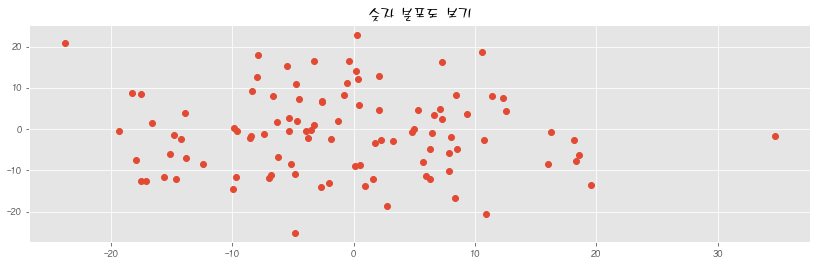

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()

## 참조 링크
https://matplotlib.org/api/font_manager_api.html <br>
https://matplotlib.org/users/customizing.html <br>
https://matplotlib.org/examples/api/unicode_minus.html <br>
https://financedata.github.io/posts/matplotlib-hangul-for-osx.html